In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

pd.set_option('max_columns', 60)

In [78]:
df = pd.read_csv('chiefs_data_clean2019.csv')

del[df['game_time']]


<AxesSubplot:>

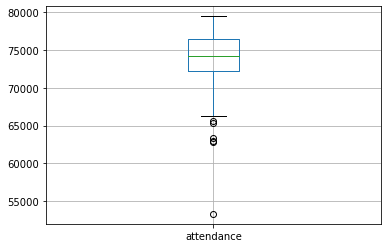

In [79]:
df.boxplot('attendance')

<AxesSubplot:>

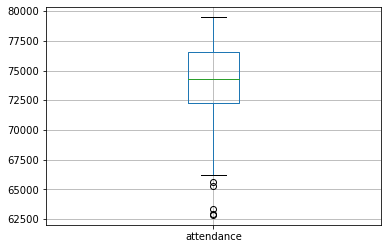

In [80]:
#take out big outlier

df = df[df['attendance'] > 55000]

df.boxplot('attendance')

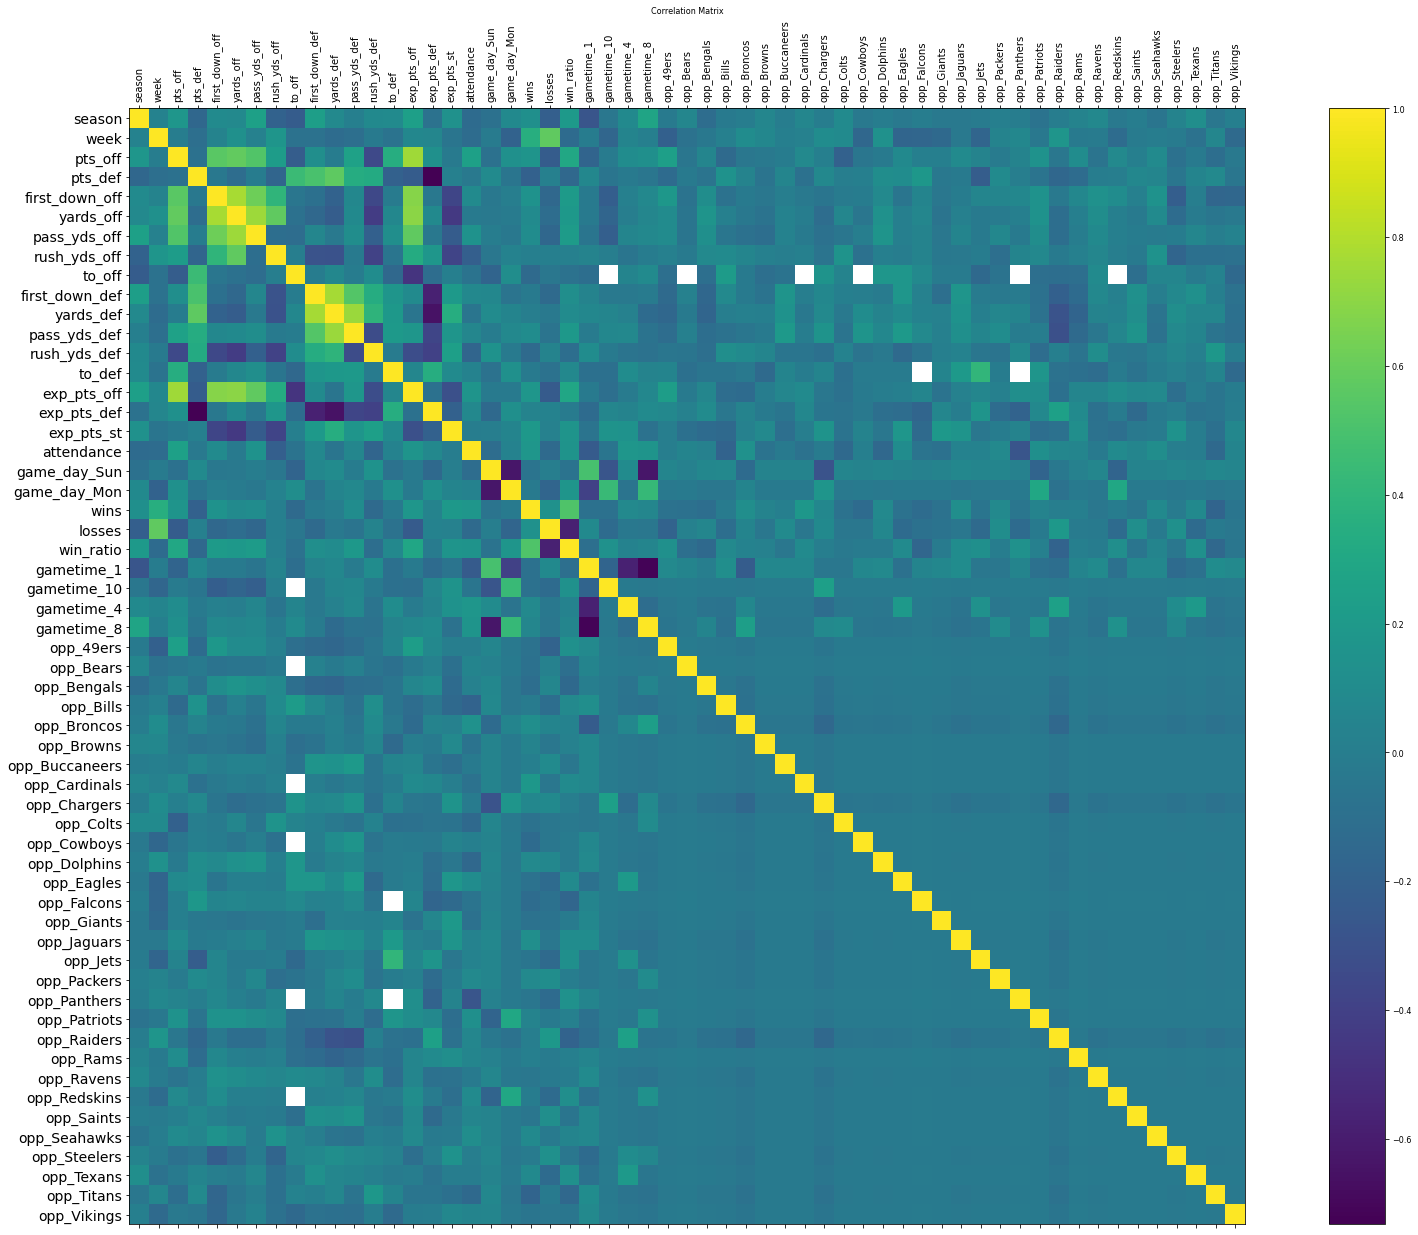

In [62]:
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

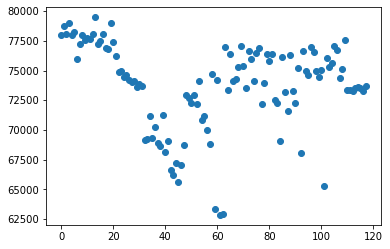

In [63]:
plt.scatter(range(len(df)), df['attendance'])
plt.show()

In [64]:
#take out to_off and to_def

del[df['to_off'], 
   df['to_def']]

In [65]:
#change around order of dataframe so attendance is to the front

target = ['attendance']
predictors = []

for x in list(df.columns):
  if x not in target:
    predictors.append(x)


In [66]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df[predictors] = scale.fit_transform(df[predictors])

df.head()

,season,week,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_10,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,-1.613121,-1.707579,0.489053,-1.320294,0.722292,0.604282,-0.324436,1.307016,-0.136606,0.586189,1.478857,-1.192610,0.832037,1.123121,-0.865345,78014,0.336463,-0.210352,-0.962232,-1.386979,1.571432,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,6.191392,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
1,-1.613121,-1.095134,0.908749,1.714668,-0.149631,0.154643,-0.050766,0.294702,1.135985,0.665075,1.950748,-1.723867,-0.505219,-0.763228,2.043018,78742,0.336463,-0.210352,-0.595963,-0.545521,-0.069665,-1.88108,-0.09245,3.286335,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,7.615773,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
2,-1.613121,-0.686838,0.593977,0.096021,-0.367611,-0.832066,-0.522086,-0.605132,1.348084,0.691371,0.993484,-0.386566,0.391864,0.185237,-0.274025,78083,0.336463,-0.210352,-0.229694,-0.545521,0.258554,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,-0.381616,-0.09245,-0.187317,7.615773,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
3,-1.613121,-0.074393,0.489053,0.298352,-0.367611,-0.245037,-0.081173,-0.267694,0.287591,-1.083575,-0.826666,-0.386566,0.206924,0.317984,-0.157905,79033,0.336463,-0.210352,0.502844,-0.124792,0.340609,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,-0.131306,2.620433,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515
4,-1.613121,0.538052,0.384129,-0.409806,0.940272,0.991472,1.454420,-0.305188,0.075493,-0.518222,0.117116,-0.881184,0.579314,0.161189,-0.549141,78025,0.336463,-0.210352,1.235382,0.295936,0.377907,0.53161,-0.09245,-0.304290,-0.381616,-0.161515,-0.09245,-0.210352,-0.231455,-0.381616,-0.131306,-0.131306,-0.131306,-0.381616,-0.161515,-0.131306,-0.161515,-0.131306,-0.09245,-0.131306,-0.210352,-0.161515,-0.161515,-0.09245,7.615773,-0.381616,-0.09245,-0.187317,-0.131306,-0.131306,-0.131306,-0.187317,-0.131306,-0.210352,-0.161515


In [67]:
#preform train_test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 123
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))

In [68]:
print(y_train.mean() / y_test.mean() - 1)

attendance   -0.003719
dtype: float64


In [69]:
x_test.shape

(24, 54)

In [70]:
#model to beat: Average of attendance

aa = []
for x in df['attendance']:
  aa.append(df['attendance'].mean())
  
np.sqrt(mean_squared_error(df['attendance'], aa))

3648.7494219955793

In [89]:
from sklearn.linear_model import LassoLars

mod = LassoLars(alpha = 18)

mod_fit = mod.fit(x_train, y_train)

mod_predict = mod.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, mod_predict)))
print('R2 score = ', r2_score(y_test,mod_predict))

RMSE = 3069.941547956729
R2 score =  0.2104992839633817


In [90]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,18,20]}

clf = GridSearchCV(estimator = mod, cv = 7, param_grid = params, 
             scoring = 'r2')

clf_fit = clf.fit(x_train, y_train)

In [91]:
print(clf_fit.best_params_)

{'alpha': 20}


In [92]:
coefs = pd.DataFrame(mod_fit.coef_).transpose()

coefs.columns = list(x_train.columns)

coefs = coefs.transpose().reset_index()

coefs.columns = ['colum','coefficient']

coefs['absolute'] = abs(coefs['coefficient'])

coefs.sort_values('absolute', ascending = False)

,colum,coefficient,absolute
7,rush_yds_off,-1233.598744,1233.598744
0,season,-970.076468,970.076468
42,opp_Panthers,-819.660092,819.660092
2,pts_off,763.492369,763.492369
20,gametime_1,-569.370129,569.370129
12,exp_pts_off,334.209820,334.209820
17,wins,308.984546,308.984546
18,losses,-303.436621,303.436621
49,opp_Seahawks,302.119682,302.119682
41,opp_Packers,297.917186,297.917186


In [93]:
#run a gridsearch

from sklearn.model_selection import GridSearchCV

params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10]}

clf = GridSearchCV(estimator = mod_fit, cv = 5, param_grid = params, 
             scoring = 'neg_mean_squared_error')

clf_fit = clf.fit(x_train, y_train)

clf_fit.best_estimator_



LassoLars(alpha=10)

In [98]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha = 20.0, normalize = False)


ridge_fit = ridge.fit(x_train, y_train)

ridge_predict = ridge_fit.predict(x_test)

print('RMSE of Ridge Regression =', np.sqrt(mean_squared_error(y_test, ridge_predict)))

mean_list = []
for row in range(len(y_test)) :
    mean_list.append(df['attendance'].mean())

print("RMSE of Using Attendance Mean as Predictor", np.sqrt(mean_squared_error(y_test, mean_list)))

mean_rmse = np.sqrt(mean_squared_error(y_test, mean_list))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))

improvement = ((mean_rmse / ridge_rmse) - 1) * 100
print("Ridge delta:", improvement)

print("RMSE of LassoLars Regression:", np.sqrt(mean_squared_error(y_test, mod_predict)))
print("LassoLars Delta:", ((mean_rmse / np.sqrt(mean_squared_error(y_test, mod_predict))) - 1) * 100)

print("R Squared of Ridge Regression:", r2_score(y_test, ridge_predict))
print("R Squared of LassoLars", r2_score(y_test, mod_predict))

RMSE of Ridge Regression = 2968.049983189136
RMSE of Using Attendance Mean as Predictor 3461.9878272780497
Ridge delta: 16.641830389870414
RMSE of LassoLars Regression: 3069.941547956729
LassoLars Delta: 12.770480258239969
R Squared of Ridge Regression: 0.2620367482108483
R Squared of LassoLars 0.2104992839633817


In [99]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,18,20]}

clf = GridSearchCV(estimator = ridge, cv = 10, param_grid = params, 
             scoring = 'neg_mean_squared_error')

print(clf_fit.best_params_)

clf_fit = clf.fit(x_train, y_train)

{'alpha': 20}


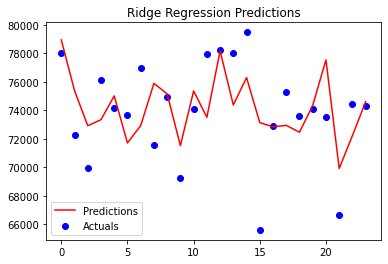

In [100]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), ridge_predict, color = 'red', label = "Predictions")
plt.title("Ridge Regression Predictions")
plt.legend()


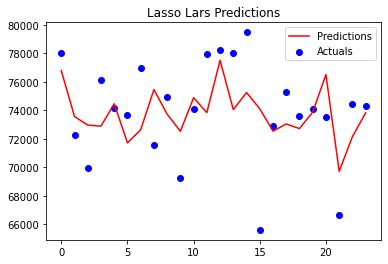

In [101]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), mod_predict, color = 'red', label = "Predictions")
plt.title("Lasso Lars Predictions")

plt.legend()

Results:

It looks like we are getting some lift in the model. If we use the attendance mean as a benchmark, the ridge model had an 8% RMSE improvement. R^2 was fairly low at .14, so there might be different models to try. I am interested in working with tensorflow regression models to see if I can increase r^2 (though this might not be possible with how little data I have).

There is a big outlier at 55,000. Will taking this out improve proformance?
 UPDATE:
 Taking out the outlier below 55,000 on attendance did have a positive effect on the model. we improved our delta from our benchmark up to 14.7 percent. R^2 also went up to 22%

 Since there aren't many datapoints in this analysis, there is no surprise that taking out the low outlier had a dramatic effect on the model performance. 


The best result was the Ridge model with a 26% R-Squared and an RMSE of 2968. Compared to the RMSE of average attendance, the LassoLars model had a delta of 18.5%

 